# Random Forest

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## Memuat Data


In [5]:
X_train = pd.read_csv('dataset/X_train.csv')
X_test = pd.read_csv('dataset/X_test.csv')
y_train = pd.read_csv('dataset/y_train.csv').values.ravel()
y_test = pd.read_csv('dataset/y_test.csv').values.ravel()

## Pelatihan Model dengan Tuning


In [6]:
rf_params = {
    'n_estimators': [100],
    'max_depth': [10, 20],  # Hindari None untuk mempercepat
    'min_samples_split': [2]
}
rf_grid = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_params,
    n_iter=8,  # Coba 8 kombinasi acak
    cv=3,      # Kurangi ke 3-fold
    scoring='r2'
)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

print("\n=== Random Forest Best Parameters ===")
print(rf_grid.best_params_)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=8. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



=== Random Forest Best Parameters ===
{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}


## Evaluasi Model


In [7]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

metrics = {
    'Model': 'Random Forest',
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Train R2': r2_score(y_train, y_train_pred),
    'Test R2': r2_score(y_test, y_test_pred)
}

cv_scores = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='r2')
metrics['CV R2 Mean'] = cv_scores.mean()
metrics['CV R2 Std'] = cv_scores.std()

## Ringkasan Hasil


In [8]:
results_df = pd.DataFrame([metrics])
print("\n=== Hasil Evaluasi Random Forest ===")
print(results_df)


=== Hasil Evaluasi Random Forest ===
           Model  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R2  \
0  Random Forest   0.257877  0.278402     0.32756   0.359401  0.892503   

    Test R2  CV R2 Mean  CV R2 Std  
0  0.871791    0.871049   0.001303  


## Visualisasi Prediksi vs Aktual

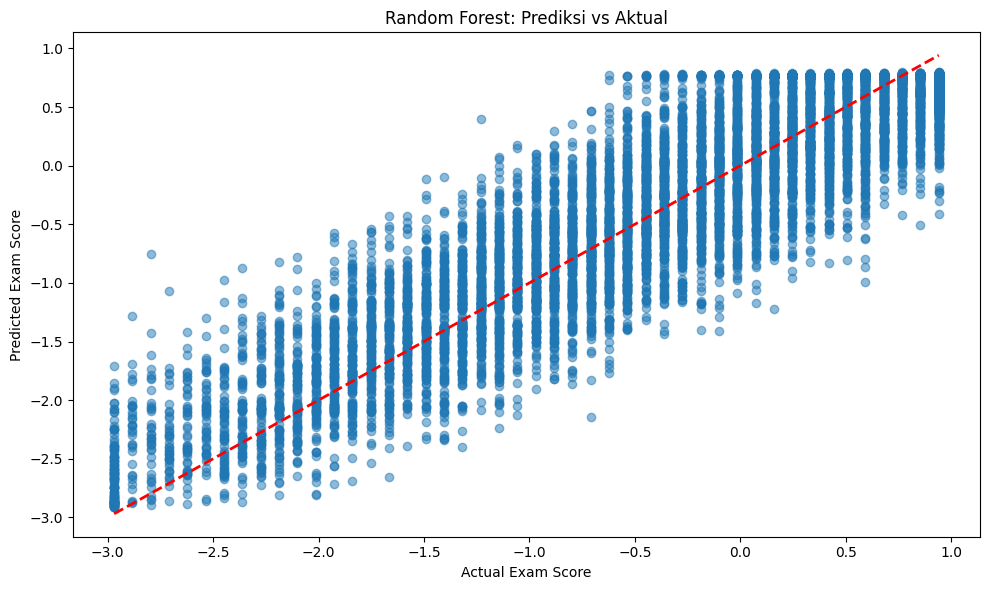

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Random Forest: Prediksi vs Aktual')
plt.tight_layout()
plt.show()

## Visualisasi Metrik

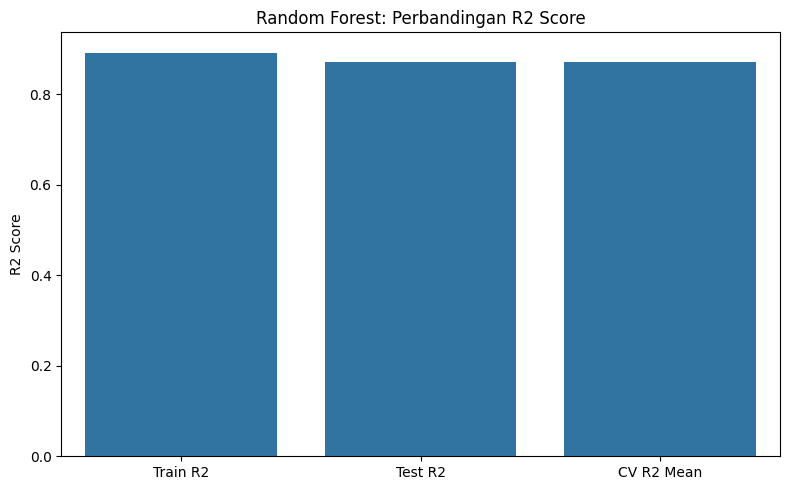

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['Train R2', 'Test R2', 'CV R2 Mean'], y=[metrics['Train R2'], metrics['Test R2'], metrics['CV R2 Mean']])
plt.title('Random Forest: Perbandingan R2 Score')
plt.ylabel('R2 Score')
plt.tight_layout()
plt.show()

## Menyimpan Model dan Hasil


In [11]:
joblib.dump(rf_best, 'random_forest_model.pkl')
results_df.to_csv('random_forest_results.csv', index=False)
print("\nModel disimpan sebagai 'random_forest_model.pkl'")
print("Hasil evaluasi disimpan sebagai 'random_forest_results.csv'")


Model disimpan sebagai 'random_forest_model.pkl'
Hasil evaluasi disimpan sebagai 'random_forest_results.csv'
